In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import os
from jdcal import gcal2jd

col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]

for i in range(1, 33):
    col_names.append(f"Sp{i}")

folder_path = "Data"
file_name = 'StA LD-DD 0118-0201-2024.txt'
file_path = os.path.join(folder_path, file_name)

df = pd.read_csv(file_path, names=col_names, sep='\s+', header=None)
df = df.set_index('Index')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')



month_map = {'Jan': 1, 'Feb': 2}
df['DateM'] = df['DateM'].str[:3].map(month_map)
df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

df.insert(0, 'Day', df['Time'].dt.day.map(day_map))

df.to_csv('steatodaA.csv')
display(df)

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-01-18 13:17:00,1,2,2,15,9,12,10,17,...,6,6,4,0,0,0,0,0,0,0
2,1,2024-01-18 13:18:00,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,2024-01-18 13:19:00,1,0,0,0,0,1,0,2,...,3,0,20,0,0,0,0,0,0,0
4,1,2024-01-18 13:20:00,1,0,0,0,4,3,0,1,...,0,0,9,0,0,0,0,0,0,0
5,1,2024-01-18 13:21:00,1,0,0,0,3,3,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,15,2024-02-01 17:33:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20418,15,2024-02-01 17:34:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20419,15,2024-02-01 17:35:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_sp25 = df.filter(['Index', 'Day', 'Time', 'Sp25'], axis=1)
print(df_sp25)

       Day                Time  Sp25
Index                               
1        1 2024-01-18 13:17:00     4
2        1 2024-01-18 13:18:00     0
3        1 2024-01-18 13:19:00    20
4        1 2024-01-18 13:20:00     9
5        1 2024-01-18 13:21:00     2
...    ...                 ...   ...
20417   15 2024-02-01 17:33:00     0
20418   15 2024-02-01 17:34:00     0
20419   15 2024-02-01 17:35:00     0
20420   15 2024-02-01 17:36:00     0
20421   15 2024-02-01 17:37:00     0

[20421 rows x 3 columns]


In [20]:
#reorganizing dataframe
def datetime_to_jd(dt):
    year, month, day = dt.year, dt.month, dt.day
    hour, minute, second = dt.hour, dt.minute, dt.second
    _, jd = gcal2jd(year, month, day)
    jd += (hour + minute / 60 + second / 3600) / 24
    return jd

df_sp25['Time'] = df_sp25['Time'].apply(datetime_to_jd)
print(df_sp25)

       Day          Time  Sp25
Index                         
1        1  60327.553472     4
2        1  60327.554167     0
3        1  60327.554861    20
4        1  60327.555556     9
5        1  60327.556250     2
...    ...           ...   ...
20417   15  60341.731250     0
20418   15  60341.731944     0
20419   15  60341.732639     0
20420   15  60341.733333     0
20421   15  60341.734028     0

[20421 rows x 3 columns]


In [25]:
from CosinorPy import cosinor
from CosinorPy import cosinor1

In [29]:
#Periodogram to determine the best period value to input into model

X = df_sp25['Time'].values
Y = df_sp25['Sp25'].values

cosinor.periodogram(X, Y, per_type='per', sampling_f = '', logscale = False, name = 'Sp25 Periodogram', save_to = 'trial_periodogram.png', prominent = False, max_per = 240)

In [36]:
#Trying a single-component cosinor model. I will assess the adequacy of this model versus a 2- and 
#3- component model using an F-test, and this will tell us which model best fits our data.

period = 24
test = 'StA LD/DD 01/18-02/01'

#Tuple contains: fitting results, estimated amplitude, estimated acrophase and statistics
results_tuple = cosinor1.fit_cosinor(X, Y, period, test='', save_to = 'cosinor_single_analysis.png', plot_on = True)
print(results_tuple)

(<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd2d0b20fa0>, 0.09753478444429244, -1.3663052477749567, {'parameters': ['Intercept', 'amp', 'acr'], 'values': array([ 0.29701945,  0.09753478, -1.36630525]), 'SE': array([0.0263854 , 0.02194816, 0.41052106]), 'CI': (array([ 0.24530502,  0.05451718, -2.17091174]), array([ 0.34873387,  0.14055239, -0.56169876])), 'p-values': array([2.14004414e-29, 8.83548926e-06, 8.74021648e-04]), 'F-test': 3.4571152311188494e-05})


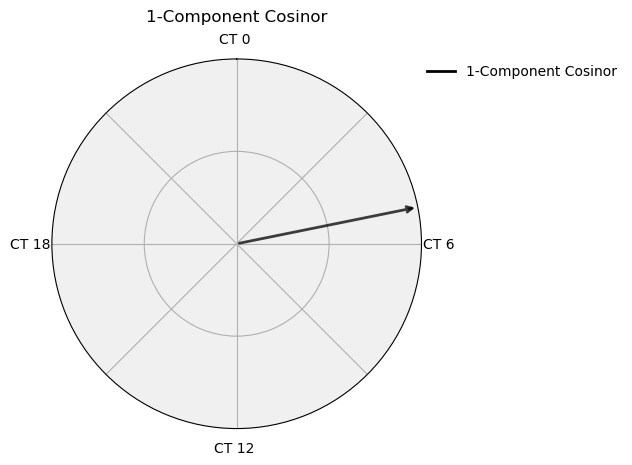

(<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd2d02d24a0>, {'p': 3.4571152311202447e-05, 'p_reject': 1.1102230246251565e-16, 'SNR': 0.031712979187196656, 'RSS': 108738.55020322927, 'resid_SE': 2.307730922388774, 'ME': 4.523337633900193}, {'period': 24, 'amplitude': 0.0975346635374229, 'acrophase': -1.3711055024676178, 'mesor': 0.2970194601405334, 'peaks': array([5.23723724]), 'heights': array([0.39455311]), 'troughs': array([17.2012012]), 'heights2': array([0.19948571]), 'max_loc': 109, 'period2': 24}, array([ 0.        ,  0.04804805,  0.0960961 ,  0.14414414,  0.19219219,
        0.24024024,  0.28828829,  0.33633634,  0.38438438,  0.43243243,
        0.48048048,  0.52852853,  0.57657658,  0.62462462,  0.67267267,
        0.72072072,  0.76876877,  0.81681682,  0.86486486,  0.91291291,
        0.96096096,  1.00900901,  1.05705706,  1.10510511,  1.15315315,
        1.2012012 ,  1.24924925,  1.2972973 ,  1.34534535,  1.39339339,
        1.44144144,  1.489489

In [63]:
results_tuple_1 = cosinor.fit_me(X, Y, n_components = 1, period = 24, model_type = 'lin', lin_comp = False, alpha = 0, name = '1-Component Cosinor', save_to = 'cosinor_1_analysis.png', plot=True, plot_residuals=False, plot_measurements=False, plot_margins=True, return_model = False, color = False, plot_phase = True, hold=False, x_label = "", y_label = "", bootstrap=False)
print(results_tuple_1)

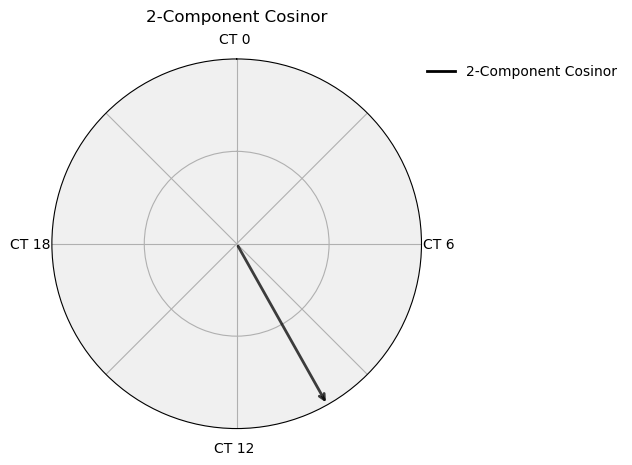

(<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd2cfd74820>, {'p': 6.623939261818368e-05, 'p_reject': 1.1102230246251565e-16, 'SNR': 0.034563395117615914, 'RSS': 108717.98715414111, 'resid_SE': 2.3076257318139684, 'ME': 4.523131478207719}, {'period': 24, 'amplitude': 0.3055510857682786, 'acrophase': -2.6290004588599265, 'mesor': 0.469093550186487, 'peaks': array([10.04204204]), 'heights': array([0.77463622]), 'troughs': array([ 1.96996997, 18.01801802]), 'heights2': array([0.3277896 , 0.16354597]), 'max_loc': 209, 'period2': 24}, array([ 0.        ,  0.04804805,  0.0960961 ,  0.14414414,  0.19219219,
        0.24024024,  0.28828829,  0.33633634,  0.38438438,  0.43243243,
        0.48048048,  0.52852853,  0.57657658,  0.62462462,  0.67267267,
        0.72072072,  0.76876877,  0.81681682,  0.86486486,  0.91291291,
        0.96096096,  1.00900901,  1.05705706,  1.10510511,  1.15315315,
        1.2012012 ,  1.24924925,  1.2972973 ,  1.34534535,  1.39339339,
   

In [53]:
#2 component cosinor model

results_tuple_2 = cosinor.fit_me(X, Y, n_components = 2, period = 24, model_type = 'lin', lin_comp = False, alpha = 0, name = '2-Component Cosinor', save_to = 'cosinor_2_analysis.png', plot=True, plot_residuals=False, plot_measurements=False, plot_margins=True, return_model = False, color = False, plot_phase = True, hold=False, x_label = "", y_label = "", bootstrap=False)
print(results_tuple_2)

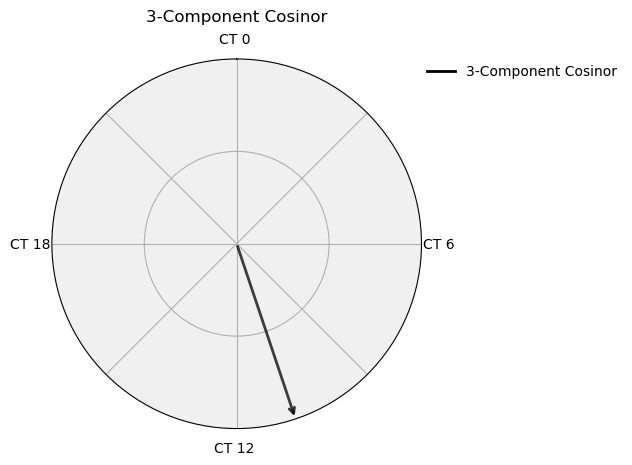

(<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd2cff1a980>, {'p': 2.0866274963449172e-07, 'p_reject': 1.1102230246251565e-16, 'SNR': 0.04518291293792292, 'RSS': 108625.80732096816, 'resid_SE': 2.3067602198563755, 'ME': 4.52143503163044}, {'period': 24, 'amplitude': 2.1588323748974405, 'acrophase': -2.817684702318773, 'mesor': 2.2252905780528582, 'peaks': array([10.76276276]), 'heights': array([4.38412295]), 'troughs': array([ 4.08408408, 17.2972973 , 22.67867868]), 'heights2': array([0.30553154, 0.0664582 , 0.24295365]), 'max_loc': 224, 'period2': 24}, array([ 0.        ,  0.04804805,  0.0960961 ,  0.14414414,  0.19219219,
        0.24024024,  0.28828829,  0.33633634,  0.38438438,  0.43243243,
        0.48048048,  0.52852853,  0.57657658,  0.62462462,  0.67267267,
        0.72072072,  0.76876877,  0.81681682,  0.86486486,  0.91291291,
        0.96096096,  1.00900901,  1.05705706,  1.10510511,  1.15315315,
        1.2012012 ,  1.24924925,  1.2972973 ,  1.34

In [59]:
#3 component cosinor model

results_tuple_3 = cosinor.fit_me(X, Y, n_components = 3, period = 24, model_type = 'lin', lin_comp = False, alpha = 0, name = '3-Component Cosinor', save_to = 'cosinor_3_analysis.png', plot=True, plot_residuals=False, plot_measurements=False, plot_margins=True, return_model = False, color = False, plot_phase = True, hold=False, x_label = "", y_label = "", bootstrap=False)
print(results_tuple_3)

In [ ]:
#Population-fit cosinor model 

In [ ]:
#Determines the best fitting model based on adjusted R-squared analysis.

#create df_results
cosinor.get_best_fits(df_results, criterium = 'R2_adj', reverse = False, n_components = [])